## Detect Rock Paper Scissors

In [1]:
import os

DATA_DIR = '/Users/rakesh.karanth/DeepLearning/TensorFlowInPractice/dataset/rock_paper_scissors/'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, "train")
TEST_DATA_DIR = os.path.join(DATA_DIR, "test")

## List a few files in the training sub-directories

In [2]:
train_rock_files = os.listdir(os.path.join(TRAIN_DATA_DIR, "rock"))
train_paper_files = os.listdir(os.path.join(TRAIN_DATA_DIR, "paper"))
train_scissors_files = os.listdir(os.path.join(TRAIN_DATA_DIR, "scissors"))

print ("Training Rock Image Names {}".format(train_rock_files[:5]))
print ()

print ("Training Paper Image Names {}".format(train_paper_files[:5]))
print ()

print ("Training Scissors Image Names {}".format(train_scissors_files[:5]))
print ()

print ("# of Training Rock Images {}".format(len(train_rock_files)))
print ("# of Training Paper Images {}".format(len(train_paper_files)))
print ("# of Training Scissors Images {}".format(len(train_scissors_files)))

Training Rock Image Names ['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png']

Training Paper Image Names ['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png']

Training Scissors Image Names ['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png']

# of Training Rock Images 840
# of Training Paper Images 840
# of Training Scissors Images 840


## Visualize a few training images

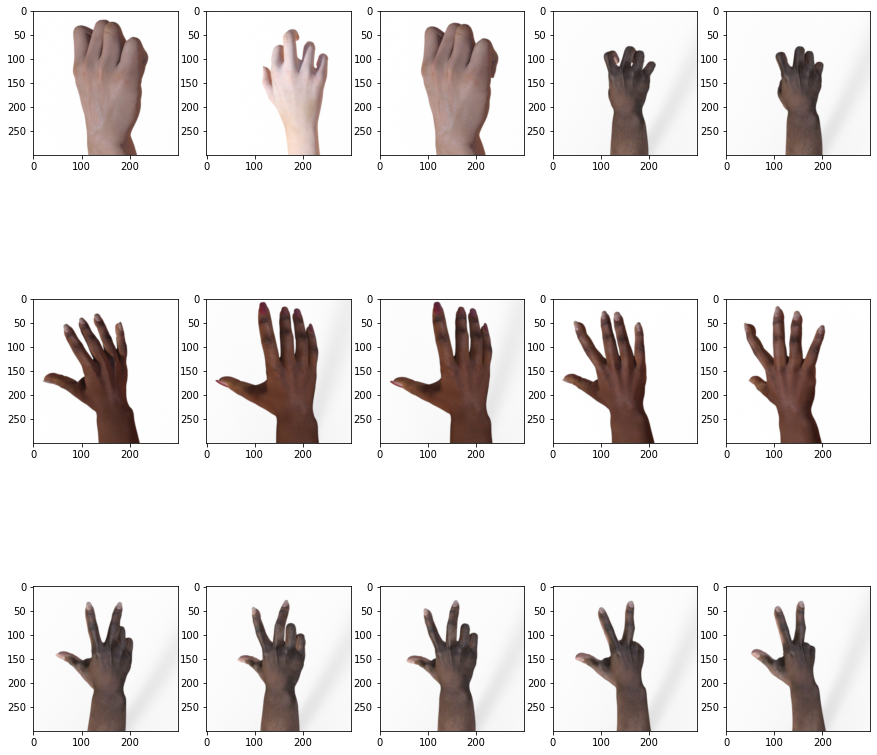

In [3]:
import matplotlib.pyplot as plt

# One row for rock, one for paper and the other for scissors
num_rows = 3
num_images = 5

figure, axes = plt.subplots(nrows=num_rows, ncols=num_images, figsize=(15,15))
for row, r_idx in zip(axes, range(0, 3)):
    # First row is for rock, second is for paper and third is for scissors
    if r_idx == 0:
        images_to_plot = [os.path.join(os.path.join(TRAIN_DATA_DIR, "rock"), image)
                          for image in train_rock_files[:num_images]]
    elif r_idx == 1:
        images_to_plot = [os.path.join(os.path.join(TRAIN_DATA_DIR, "paper"), image)
                          for image in train_paper_files[:num_images]]
    else:
        images_to_plot = [os.path.join(os.path.join(TRAIN_DATA_DIR, "scissors"), image)
                          for image in train_scissors_files[:num_images]]
    
    for column, image in zip(row, images_to_plot):
        image_data = plt.imread(image)
        column.imshow(image_data)

plt.show()

## Data Preprocessing

Set up data generators that will read pictures in the source folder, convert them to float32 tensors, and feed them (along with the labels) to our Neural Network. We need to have one generator for the training data and one for the test data.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For the training data try out image augmentation
train_data_image_gen = ImageDataGenerator(
    rescale=1.0/255,        # Rescale images by multiplying each value in the tensor by (1.0/255)
    rotation_range=20,      # Rotate image by random amounts between [0-20]
    width_shift_range=0.2,  # Randomly move subjects by 20% horizontally within the image
    height_shift_range=0.2, # Randomly move subjects by 20% vertically within the image
    shear_range=0.2,        # Apply shear mapping of 20% 
    zoom_range=0.2,         # Apply 20% zoom on the input image
    fill_mode="nearest"     # Fill lost pixels by looking at the nearest neighbors
)

# No need of any image augmentation for the test data
test_data_image_gen = ImageDataGenerator(rescale=1.0/255)

# Get the actual training data generator
train_generator = train_data_image_gen.flow_from_directory(
    TRAIN_DATA_DIR,             # The directory in which the training images can be found
    target_size = (150, 150),      # Each image should be of size (150, 150)
    class_mode = "categorical",    # We are dealing with a multi-class classification problem
    batch_size = 32                # Load images in batches of size 32
)

# Get the actual test data generator
test_generator = test_data_image_gen.flow_from_directory(
    TEST_DATA_DIR,                 # The directory in which the test images can be found
    target_size = (150, 150),      # Each image should be of size (150, 150)
    class_mode = "categorical",    # We are dealing with a multi-class classification problem
    batch_size = 32                # Load images in batches of size 32
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Get the training image labels

In [5]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### See how the data generator works with a rock image

Found 1 validated image filenames belonging to 1 classes.


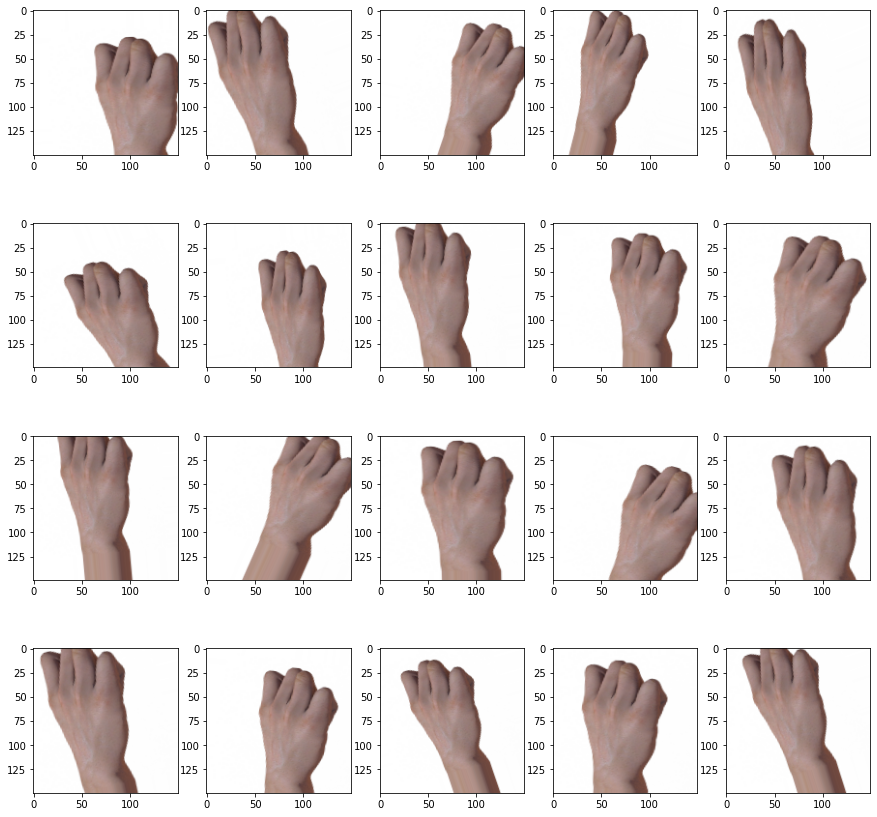

In [6]:
import pandas as pd

rock_df = pd.DataFrame({
    "image_name" : [train_rock_files[0]],
    "string_label" : ["rock"]
})

sample_rock_generator = train_data_image_gen.flow_from_dataframe(
    rock_df,
    directory = os.path.join(TRAIN_DATA_DIR, "rock"),
    x_col = "image_name",
    y_col = "string_label",
    target_size = (150, 150),
    class_mode = "categorical"
)

# Let us look at 20 image augmentations in total
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15))
for row in axes:
    for column in row:
        rock_image_data = sample_rock_generator.next()
        rock_image_data = rock_image_data[0]
        rock_image_data = rock_image_data.reshape(rock_image_data.shape[1],
                                                  rock_image_data.shape[2],
                                                  rock_image_data.shape[3])
        column.imshow(rock_image_data)

plt.show()

### See how the data generator works with a paper image

Found 1 validated image filenames belonging to 1 classes.


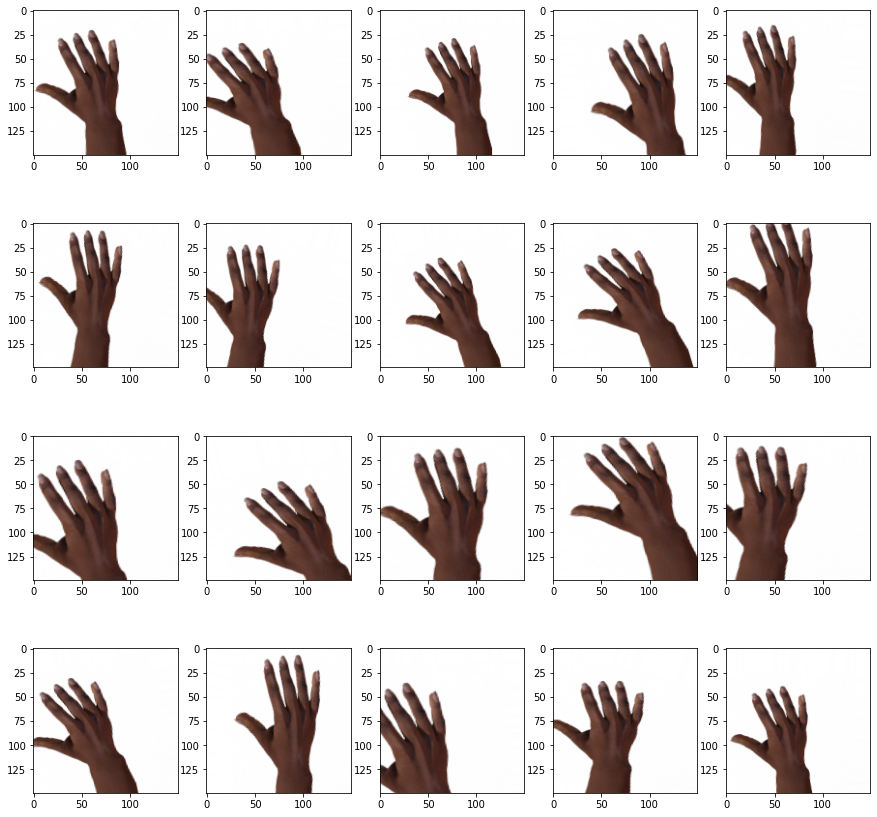

In [7]:
paper_df = pd.DataFrame({
    "image_name" : [train_paper_files[0]],
    "string_label" : ["paper"]
})

sample_paper_generator = train_data_image_gen.flow_from_dataframe(
    paper_df,
    directory = os.path.join(TRAIN_DATA_DIR, "paper"),
    x_col = "image_name",
    y_col = "string_label",
    target_size = (150, 150),
    class_mode = "categorical"
)

# Let us look at 20 image augmentations in total
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15))
for row in axes:
    for column in row:
        paper_image_data = sample_paper_generator.next()
        paper_image_data = paper_image_data[0]
        paper_image_data = paper_image_data.reshape(paper_image_data.shape[1],
                                                    paper_image_data.shape[2],
                                                    paper_image_data.shape[3])
        column.imshow(paper_image_data)

plt.show()

### See how the data generator works with a scissors image

Found 1 validated image filenames belonging to 1 classes.


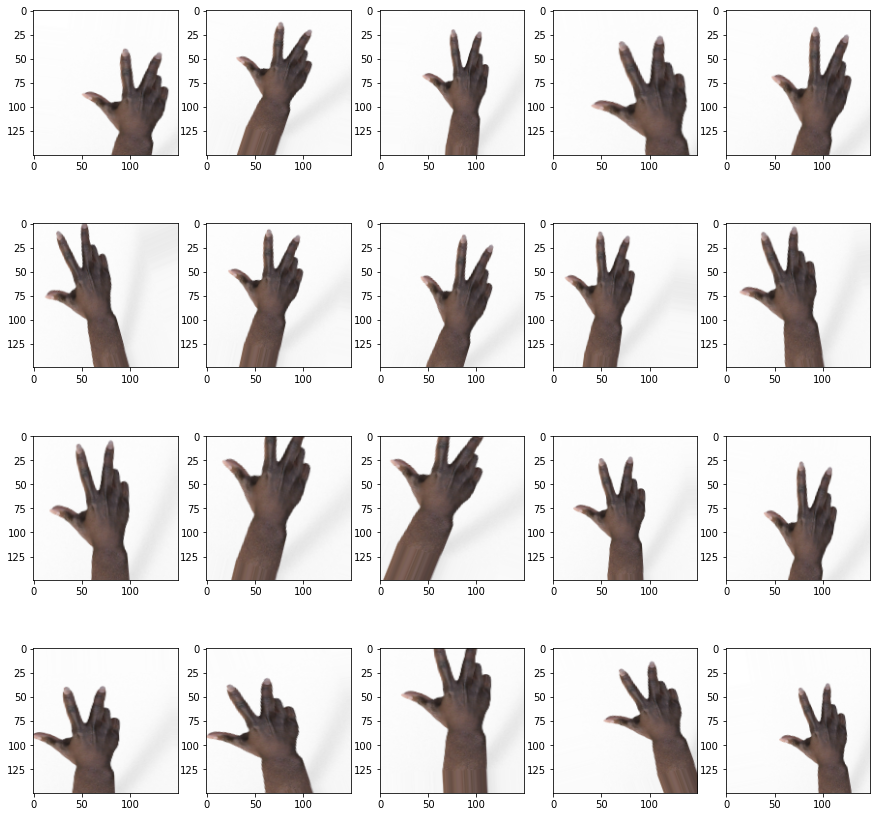

In [8]:
scissors_df = pd.DataFrame({
    "image_name" : [train_scissors_files[0]],
    "string_label" : ["scissors"]
})

sample_scissors_generator = train_data_image_gen.flow_from_dataframe(
    scissors_df,
    directory = os.path.join(TRAIN_DATA_DIR, "scissors"),
    x_col = "image_name",
    y_col = "string_label",
    target_size = (150, 150),
    class_mode = "categorical"
)

# Let us look at 20 image augmentations in total
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15))
for row in axes:
    for column in row:
        scissors_image_data = sample_scissors_generator.next()
        scissors_image_data = scissors_image_data[0]
        scissors_image_data = scissors_image_data.reshape(scissors_image_data.shape[1],
                                                          scissors_image_data.shape[2],
                                                          scissors_image_data.shape[3])
        column.imshow(scissors_image_data)

plt.show()

## Build a Convolutional Neural Network

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential()

# Create a Convolutional layer that accepts image data in matrix form.
# This layer learns 16 filters each of size kernel_size. (In this case 3 x 3)
# The filters are used to transform the input image. (Like enhance image edges and relevant features)
# Each image being fed into the convolution has a shape of 150 x 150 and has 3 color channels
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=tf.nn.relu,
                                 input_shape=(150, 150, 3)))

# Create a MaxPool layer that looks at the transformed image 2 x 2 pixels at a time.
# This layer helps replace each 2 x 2 sub section of the image with the max pixel value found in the sub section. 
# This function effectively turns 4 pixels into 1.
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional and MaxPooling layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional and MaxPooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add a global max pooling layer 
model.add(tf.keras.layers.GlobalMaxPooling2D())

# Add a hidden layer
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))

# Compute the output using softmax (This is a multiclass classification problem)
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

### Provide the optimizer and loss function

In [10]:
model.compile(optimizer = tf.optimizers.RMSprop(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

### Get the model summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

## Train the Neural Network

In [12]:
history = model.fit(train_generator, epochs=8)

  ...
    to  
  ['...']
Train for 79 steps
Epoch 1/8
79/79 [==============================] - 30s 374ms/step - loss: 0.9331 - accuracy: 0.5369
Epoch 2/8
79/79 [==============================] - 28s 360ms/step - loss: 0.5739 - accuracy: 0.7698
Epoch 3/8
79/79 [==============================] - 30s 377ms/step - loss: 0.3945 - accuracy: 0.8488
Epoch 4/8
79/79 [==============================] - 28s 350ms/step - loss: 0.3135 - accuracy: 0.8897
Epoch 5/8
79/79 [==============================] - 27s 347ms/step - loss: 0.2038 - accuracy: 0.9274
Epoch 6/8
79/79 [==============================] - 29s 362ms/step - loss: 0.1809 - accuracy: 0.9353
Epoch 7/8
79/79 [==============================] - 28s 349ms/step - loss: 0.1487 - accuracy: 0.9528
Epoch 8/8
79/79 [==============================] - 24s 307ms/step - loss: 0.1513 - accuracy: 0.9464


## Display Training loss and accuracy

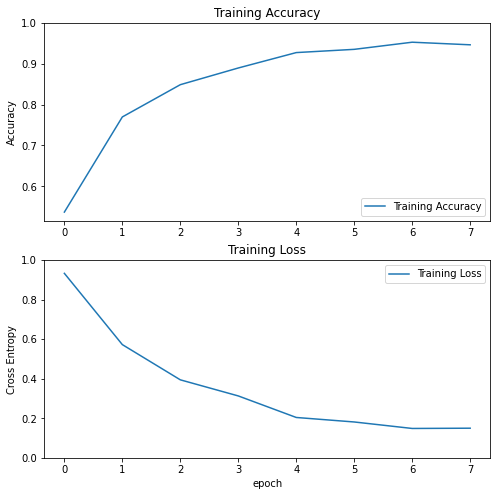

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

## Evaluate the Neural Network on the test set

In [14]:
model.evaluate(test_generator)

  ...
    to  
  ['...']
12/12 [==============================] - 2s 146ms/step - loss: 0.1030 - accuracy: 0.9866


[0.10300074346984427, 0.98655915]

## Look at a single test image

Found 1 validated image filenames belonging to 1 classes.
[[9.8540199e-01 5.3213246e-04 1.4065921e-02]]

{'paper': 0, 'rock': 1, 'scissors': 2}

Image most resembles Label = 0

Actual Image



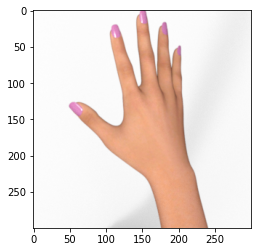

In [16]:
import numpy as np

test_df = pd.DataFrame({
    "image_name" : ["testpaper01-06.png"],
    "string_label" : ["paper"]
})

sample_test_generator = test_data_image_gen.flow_from_dataframe(
    test_df,
    directory = os.path.join(TEST_DATA_DIR, "paper"),
    x_col = "image_name",
    y_col = "string_label",
    target_size = (150, 150),
    class_mode = "categorical"
)

single_test_example = sample_test_generator.next()

# We need to do this because the NN expects inputs of form (*, (150, 150, 3))
single_test_example = single_test_example[0]
single_test_example = single_test_example.reshape(1,
                                                  single_test_example.shape[1],
                                                  single_test_example.shape[2],
                                                  single_test_example.shape[3])

# Compute the model's prediction
prediction = model.predict(single_test_example)
print (prediction)

# Print the labels again for reference
print ()
print (train_generator.class_indices)

# Which label has the highest confidence value
print ()
print ("Image most resembles Label = {}".format(np.argmax(prediction[0])))

# Plot the image
print ()
print ("Actual Image")
print ()
image_data = plt.imread(os.path.join(os.path.join(TEST_DATA_DIR, "paper"), "testpaper01-06.png"))
plt.imshow(image_data)
plt.show()